In [1]:
import networkx as nx

In [2]:
nx.__version__

'2.1'

In [3]:
%cd /content/drive/MyDrive/airport_traffic_analisis

/content/drive/MyDrive/airport_traffic_analisis


In [4]:
!git clone https://github.com/alvarofpp/dataset-flights-brazil.git

fatal: destination path 'dataset-flights-brazil' already exists and is not an empty directory.


In [5]:
%cd dataset-flights-brazil/

/content/drive/MyDrive/airport_traffic_analisis/dataset-flights-brazil


In [6]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached beautifulsoup4-4.9.3-py3-none-any.whl (115 kB)
  Using cached certifi-2021.5.30-py2.py3-none-any.whl (145 kB)
  Using cached charset_normalizer-2.0.3-py3-none-any.whl (35 kB)
  Using cached click-8.0.1-py3-none-any.whl (97 kB)
  Using cached decorator-5.0.9-py3-none-any.whl (8.9 kB)
  Using cached future-0.18.2.tar.gz (829 kB)
  Using cached idna-3.2-py3-none-any.whl (59 kB)
  Using cached networkx-2.5.1-py3-none-any.whl (1.6 MB)
  Using cached numpy-1.21.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached pandas-1.3.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (10.8 MB)
ERROR: Could not find a version that satisfies the requirement pkg-resources==0.0.0 (from versions: none)
ERROR: No matching distribution found for pkg-resources==0.0.0


# Removendo linhas com região 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
airports_csv = pd.read_csv('/content/drive/MyDrive/airport_traffic_analisis/dataset-flights-brazil/data/airports.csv')
airports_csv.head()
print(f'Tamanho do dataset: {len(airports_csv)}')
airports_csv.head()

Tamanho do dataset: 1116


Unnamed: 0  code                        name state  region  \
0           0  SBPA                PORTO ALEGRE    RS     SUL   
1           1  SKLT                     LETICIA   NaN  ABROAD   
2           2  SLVR                  SANTA CRUZ   NaN  ABROAD   
3           3  KDFW  DALLAS & FORT WORTH, TEXAS   NaN  ABROAD   
4           4  KJFK          NEW YORK, NEW YORK   NaN  ABROAD   

                     country         continent Código OACI  lat_geo_point  \
0                     BRASIL    AMÉRICA DO SUL         NaN     -29.994400   
1                   COLÔMBIA    AMÉRICA DO SUL         NaN      -4.193550   
2                    BOLÍVIA    AMÉRICA DO SUL         NaN     -17.644800   
3  ESTADOS UNIDOS DA AMÉRICA  AMÉRICA DO NORTE         NaN      32.896801   
4  ESTADOS UNIDOS DA AMÉRICA  AMÉRICA DO NORTE         NaN      40.639801   

   lon_geo_point  
0     -51.171398  
1     -69.943200  
2     -63.135399  
3     -97.038002  
4     -73.778900

In [9]:
!python extract.py
!python transform_to_anac_csv.py

100% 23/23 [00:00<00:00, 5947.53it/s]
sys:1: DtypeWarning: Columns (24,25,29) have mixed types. Specify dtype option on import or set low_memory=False.


# Adicionar atributo 'region' aos nós
```py
for index, row in df_airports.iterrows():
    G.add_node(row['code'],
               name=row['name'],
               country=row['country'],
               latitude=row['lat_geo_point'],
               longitude=row['lon_geo_point'],
               region=row['region'] #line added
               )




In [10]:
!pip install geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!python transform_to_airports_csv.py

transform_to_airports_csv.py:100: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df_coordinates = pd.concat([df_airfields, df_others_airports])


In [12]:
airports_csv = pd.read_csv('/content/drive/MyDrive/airport_traffic_analisis/dataset-flights-brazil/data/airports.csv')
airports_csv['region'].fillna('ABROAD', inplace = True)
#airports_csv = airports_csv.dropna(subset=['region'])
airports_csv.to_csv('/content/drive/MyDrive/airport_traffic_analisis/dataset-flights-brazil/data/airports.csv')
airports_csv.head()

code                        name state  region                    country  \
0  SBPA                PORTO ALEGRE    RS     SUL                     BRASIL   
1  SKLT                     LETICIA   NaN  ABROAD                   COLÔMBIA   
2  SLVR                  SANTA CRUZ   NaN  ABROAD                    BOLÍVIA   
3  KDFW  DALLAS & FORT WORTH, TEXAS   NaN  ABROAD  ESTADOS UNIDOS DA AMÉRICA   
4  KJFK          NEW YORK, NEW YORK   NaN  ABROAD  ESTADOS UNIDOS DA AMÉRICA   

          continent Código OACI  lat_geo_point  lon_geo_point  
0    AMÉRICA DO SUL         NaN     -29.994400     -51.171398  
1    AMÉRICA DO SUL         NaN      -4.193550     -69.943200  
2    AMÉRICA DO SUL         NaN     -17.644800     -63.135399  
3  AMÉRICA DO NORTE         NaN      32.896801     -97.038002  
4  AMÉRICA DO NORTE         NaN      40.639801     -73.778900

In [13]:
!python transform_to_graphml.py

sys:1: DtypeWarning: Columns (24,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
Traceback (most recent call last):
  File "transform_to_graphml.py", line 26, in <module>
    for index, row in df_edges.iterrows():
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py", line 4372, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'Series' object has no attribute 'iterrows'


In [14]:
air_trafic = nx.read_graphml('/content/drive/MyDrive/airport_traffic_analisis/dataset-flights-brazil/data/air_traffic.graphml')

In [15]:
print(f'The graph has {len(air_trafic.nodes(data=True))} nodes and {len(air_trafic.edges(data=True))} edges')

The graph has 1116 nodes and 9975 edges


In [16]:
air_trafic.nodes(data=True)['KDFW']['region']

'ABROAD'

In [17]:
regions= ['NORTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'SUL']

In [18]:
for i, data in list(air_trafic.nodes(data=True)): 
  if data['region'] not in regions:
    air_trafic.remove_node(i)
  print(i,data)


SBPA {'name': 'PORTO ALEGRE', 'country': 'BRASIL', 'latitude': -29.994400024414062, 'longitude': -51.1713981628418, 'region': 'SUL'}
SKLT {'name': 'LETICIA', 'country': 'COLÔMBIA', 'latitude': -4.19355, 'longitude': -69.9432, 'region': 'ABROAD'}
SLVR {'name': 'SANTA CRUZ', 'country': 'BOLÍVIA', 'latitude': -17.6448, 'longitude': -63.135399, 'region': 'ABROAD'}
KDFW {'name': 'DALLAS & FORT WORTH, TEXAS', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 32.896801, 'longitude': -97.038002, 'region': 'ABROAD'}
KJFK {'name': 'NEW YORK, NEW YORK', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 40.639801, 'longitude': -73.7789, 'region': 'ABROAD'}
KMIA {'name': 'MIAMI, FLORIDA', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 25.79319953918457, 'longitude': -80.29060363769531, 'region': 'ABROAD'}
SBGL {'name': 'RIO DE JANEIRO', 'country': 'BRASIL', 'latitude': -22.8099994659, 'longitude': -43.2505569458, 'region': 'SUDESTE'}
SBGR {'name': 'GUARULHOS', 'country': 'BRASIL', 'latitud

In [19]:
print(f'The graph has {len(air_trafic.nodes(data=True))} nodes and {len(air_trafic.edges(data=True))} edges')

The graph has 505 nodes and 4512 edges


In [20]:
air_trafic.edges(data=True)

EdgeDataView([('SBPA', 'SBAQ', {'flight_count': 1}), ('SBPA', 'SBAR', {'flight_count': 90}), ('SBPA', 'SBAT', {'flight_count': 4}), ('SBPA', 'SBAU', {'flight_count': 2}), ('SBPA', 'SBAX', {'flight_count': 1}), ('SBPA', 'SBBE', {'flight_count': 180}), ('SBPA', 'SBBG', {'flight_count': 26}), ('SBPA', 'SBBH', {'flight_count': 98}), ('SBPA', 'SBBR', {'flight_count': 1142}), ('SBPA', 'SBBV', {'flight_count': 26}), ('SBPA', 'SBCA', {'flight_count': 44}), ('SBPA', 'SBCB', {'flight_count': 11}), ('SBPA', 'SBCD', {'flight_count': 35}), ('SBPA', 'SBCF', {'flight_count': 787}), ('SBPA', 'SBCG', {'flight_count': 313}), ('SBPA', 'SBCH', {'flight_count': 286}), ('SBPA', 'SBCJ', {'flight_count': 1}), ('SBPA', 'SBCM', {'flight_count': 70}), ('SBPA', 'SBCN', {'flight_count': 10}), ('SBPA', 'SBCO', {'flight_count': 3}), ('SBPA', 'SBCP', {'flight_count': 2}), ('SBPA', 'SBCR', {'flight_count': 1}), ('SBPA', 'SBCT', {'flight_count': 1657}), ('SBPA', 'SBCX', {'flight_count': 183}), ('SBPA', 'SBCY', {'flight

In [21]:
nx.attribute_assortativity_coefficient(air_trafic, 'region')

0.36858192263245576

In [22]:
!pip install nxviz==0.4.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.14.5-cp37-cp37m-manylinux1_x86_64.whl (12.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires numpy>=1.16.0, but you have numpy 1.14.5 which is incompatible.
xarray 0.20.2 requires numpy>=1.18, but you have numpy 1.14.5 which is incompatible.
xarray 0.20.2 requires pandas>=1.1, but you have pandas 0.23.1 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.14.5 which is incompatible.
tifffile 2021.11.2 requires numpy>=1.15.1, but you have numpy 1.14.5 which is incompatible.
thinc 8.1.5 requires numpy>=1.15.0, but you have numpy 1.14

In [23]:
!pip list
!pip install numpy==1.21.6

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
asn1crypto                    1.5.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis 

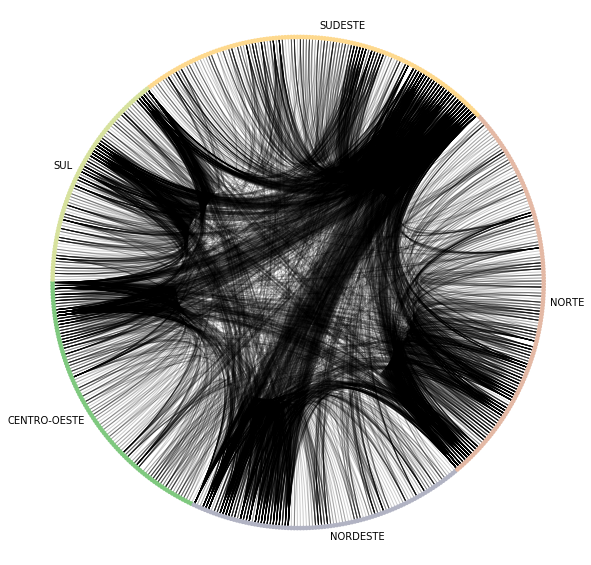

In [24]:
import nxviz as nv
c = nv.CircosPlot(air_trafic,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,
                  figsize=(10,10))


# Draw c to the screen
c.draw()

# Display graph
plt.show()

In [25]:
degree, av_neigh_degree = zip(*nx.average_degree_connectivity(air_trafic).items())

In [26]:
nx.attribute_mixing_matrix(air_trafic,'region')

array([[0.04986702, 0.01252216, 0.02393617, 0.0106383 , 0.03291223],
       [0.01252216, 0.07180851, 0.00742465, 0.01340869, 0.03989362],
       [0.02393617, 0.00742465, 0.13652482, 0.01983599, 0.02870124],
       [0.0106383 , 0.01340869, 0.01983599, 0.0802305 , 0.05529699],
       [0.03291223, 0.03989362, 0.02870124, 0.05529699, 0.17242908]])

In [27]:
import numpy as np
degree = np.array(degree)
av_neigh_degree = np.array(av_neigh_degree)

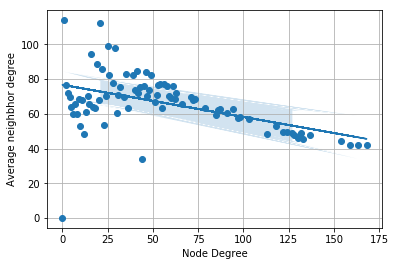

In [28]:

N = 21
x = degree
y = av_neigh_degree

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.set_xlabel('Node Degree')
ax.set_ylabel('Average neighbhor degree')
ax.grid()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:blue')


In [47]:
def pos_of_nodes(grafh):
  nodes =nx.get_node_attributes(grafh,'region')

  lat = nx.get_node_attributes(grafh,'latitude').values()
  lon = nx.get_node_attributes(grafh,'longitude').values()
  pos = { node:(lati,long) for node , lati, long in zip(nodes.keys(),lat,lon)}
  return pos


In [29]:
nx.degree_assortativity_coefficient(air_trafic)

-0.19522933769365425

#  Quantos componentes conectados existem na malha aérea brasileira?


In [30]:
list(nx.connected_components(air_trafic))
list(map(len,nx.connected_components(air_trafic)))

[500, 1, 1, 1, 1, 1]

In [31]:
list(nx.connected_components(air_trafic))

[{'1AON',
  '2NHT',
  '6ASO',
  'SBAA',
  'SBAC',
  'SBAE',
  'SBAF',
  'SBAG',
  'SBAM',
  'SBAN',
  'SBAQ',
  'SBAR',
  'SBAS',
  'SBAT',
  'SBAU',
  'SBAV',
  'SBAX',
  'SBBE',
  'SBBG',
  'SBBH',
  'SBBI',
  'SBBP',
  'SBBQ',
  'SBBR',
  'SBBT',
  'SBBU',
  'SBBV',
  'SBBW',
  'SBBZ',
  'SBCA',
  'SBCB',
  'SBCC',
  'SBCD',
  'SBCF',
  'SBCG',
  'SBCH',
  'SBCI',
  'SBCJ',
  'SBCM',
  'SBCN',
  'SBCO',
  'SBCP',
  'SBCR',
  'SBCT',
  'SBCV',
  'SBCX',
  'SBCY',
  'SBCZ',
  'SBDB',
  'SBDN',
  'SBDO',
  'SBEG',
  'SBEK',
  'SBFC',
  'SBFE',
  'SBFI',
  'SBFL',
  'SBFN',
  'SBFZ',
  'SBGL',
  'SBGM',
  'SBGO',
  'SBGP',
  'SBGR',
  'SBGS',
  'SBGU',
  'SBGV',
  'SBHT',
  'SBIC',
  'SBIH',
  'SBIL',
  'SBIP',
  'SBIT',
  'SBIZ',
  'SBJA',
  'SBJC',
  'SBJD',
  'SBJE',
  'SBJF',
  'SBJI',
  'SBJP',
  'SBJR',
  'SBJU',
  'SBJV',
  'SBKG',
  'SBKP',
  'SBLE',
  'SBLJ',
  'SBLN',
  'SBLO',
  'SBLP',
  'SBLS',
  'SBMA',
  'SBMC',
  'SBMD',
  'SBME',
  'SBMG',
  'SBMH',
  'SBMI',
  'SBMK',


In [32]:
import random 

Nó do Norte = SWBI
Nó do sul = SSAE

In [33]:
def code_to_name(code):
  for i, data in list(air_trafic.nodes(data=True)): 
    if i == code:
      return data['name']


In [34]:
city1 = 'SWBI' #'BARREIRINHA'
city2 = 'SSAE' #'ARROIO GRANDE'
city3= 'SNMU' #'MUCURI'
city4 = 'SWDE' #'SÃO MIGUEL DO ARAGUAIA'
city5 = 'SDDM' # RIO DE JANEIRO

if nx.has_path(air_trafic,"SWBI","SSAE"):
  path = nx.shortest_path(air_trafic,"SWBI","SSAE")
list(map(code_to_name, path))

['BARREIRINHA', 'MANAUS', 'GUARULHOS', 'ARROIO GRANDE']

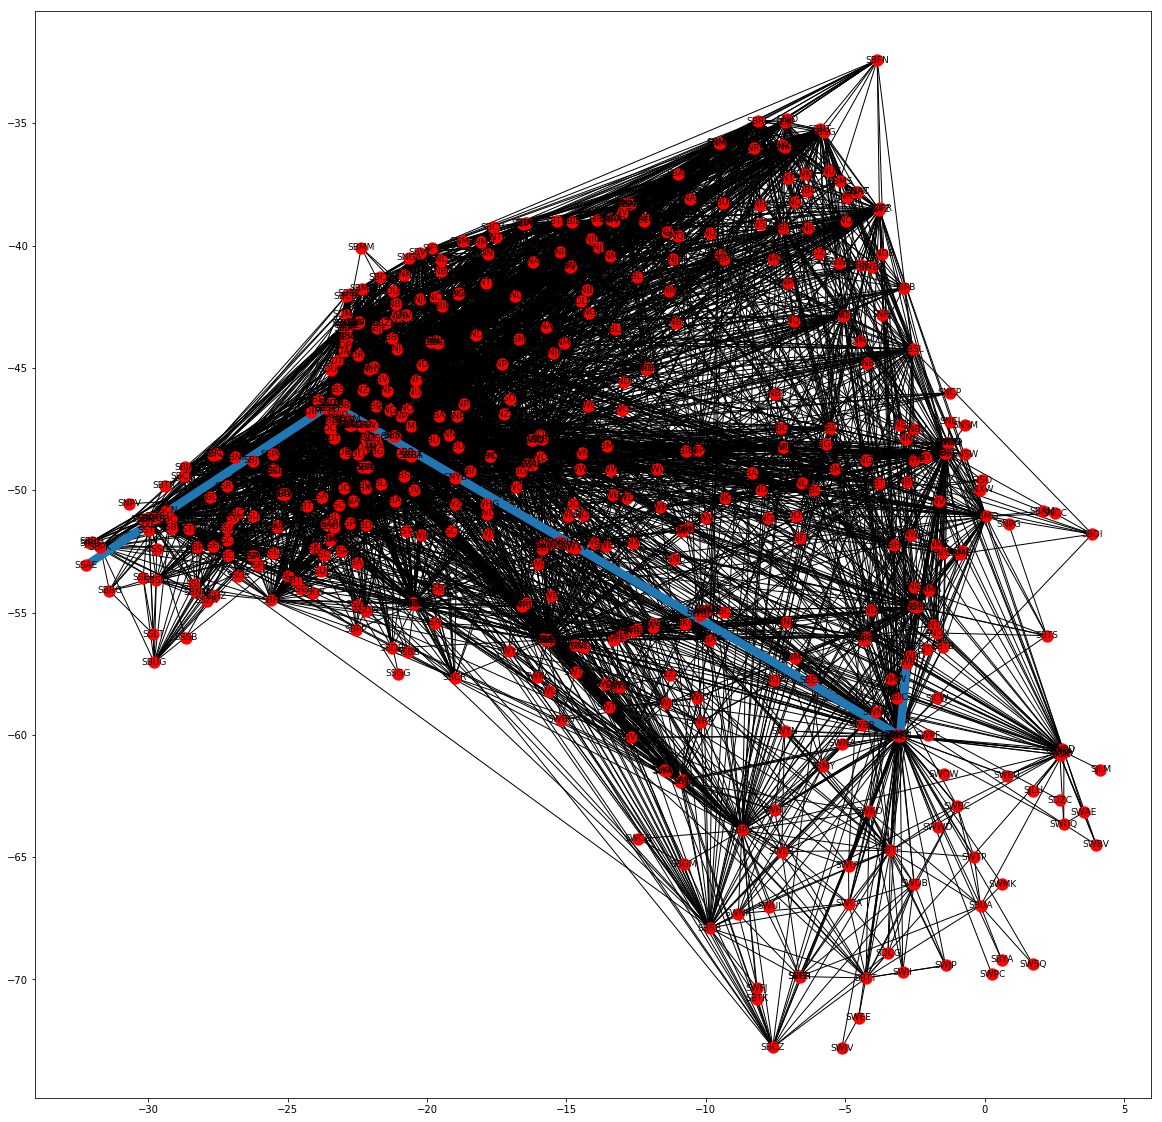

In [64]:

pos = pos_of_nodes(air_trafic)
plt.figure(figsize = (20,20))
nx.draw_networkx(air_trafic, pos =pos, linewidths = 0.1,font_size = 9 , node_size =150 )
nx.draw_networkx_edges(
    air_trafic,
    pos,
    edgelist=[('SWBI', 'SBEG'), ('SBEG', 'SBGR'), ('SBGR', 'SSAE')],
    width=8,
    alpha=1,
    edge_color="tab:blue",
)
nx.draw_networkx_edges(
    air_trafic,
    pos,
    edgelist=[('SWBI', 'SBEG'), ('SBEG', 'SBGR'), ('SBGR', 'SSAE')],
    width=8,
    alpha=1,
    edge_color="tab:blue",
)


plt.show()

In [66]:
if nx.has_path(air_trafic,city2, city3 ):
  path = nx.shortest_path(air_trafic,city2,city3)
print(list(map(code_to_name, path)))
print(path)

['ARROIO GRANDE', 'GUARULHOS', 'MUCURI']
['SSAE', 'SBGR', 'SNMU']


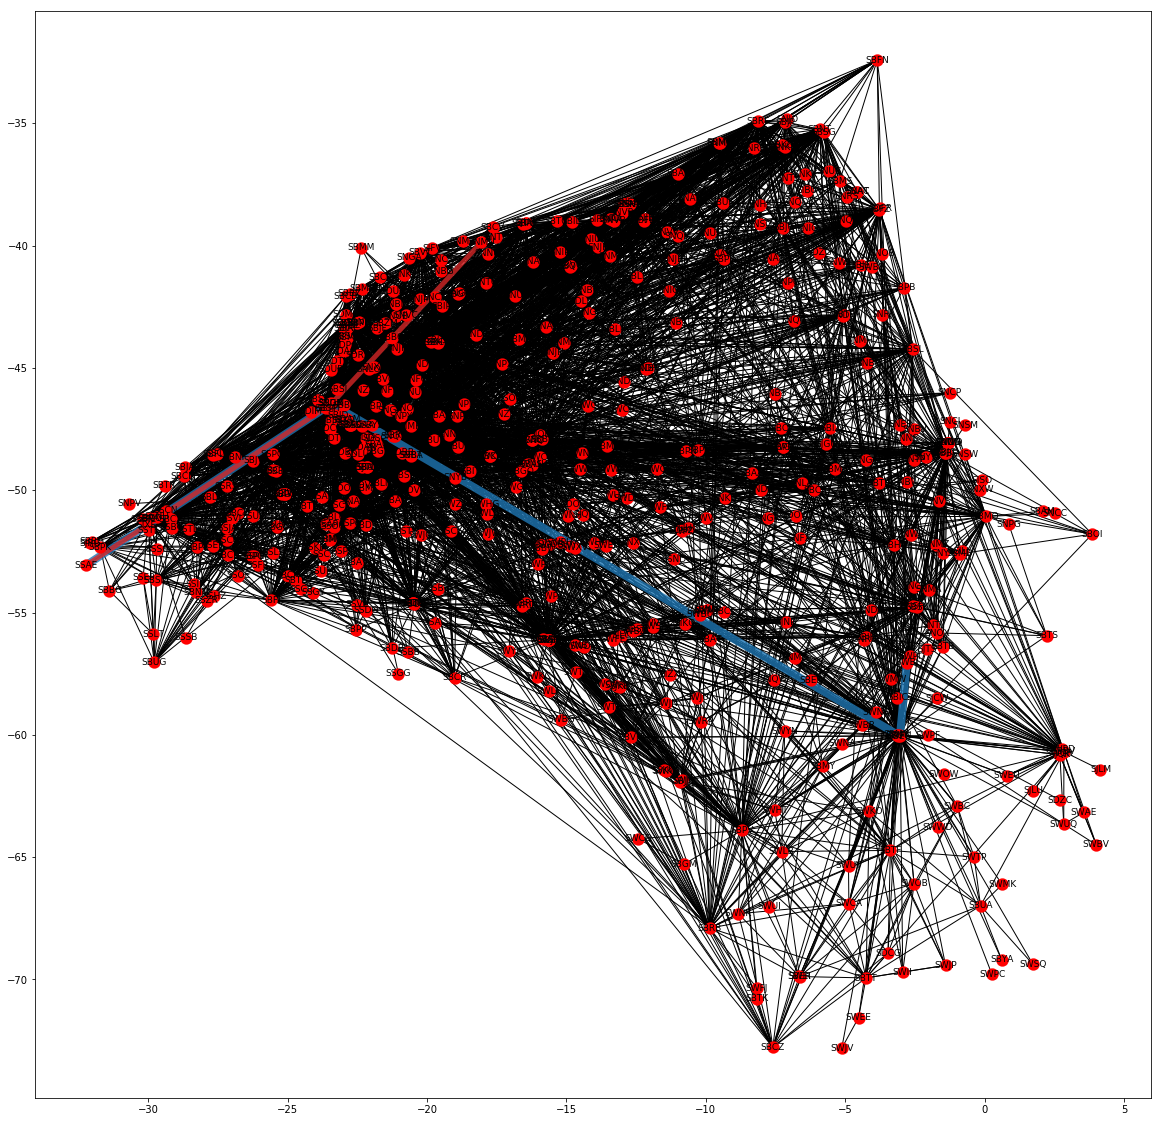

In [70]:
pos = pos_of_nodes(air_trafic)
plt.figure(figsize = (20,20))
nx.draw_networkx(air_trafic, pos =pos, linewidths = 0.1,font_size = 9 , node_size =150 )
nx.draw_networkx_edges(
    air_trafic,
    pos,
    edgelist=[('SWBI', 'SBEG'), ('SBEG', 'SBGR'), ('SBGR', 'SSAE')],
    width=8,
    alpha=0.8,
    edge_color="tab:blue",
)
nx.draw_networkx_edges(
    air_trafic,
    pos,
    edgelist=[('SSAE','SBGR'), ('SBGR', 'SNMU')],
    width=5,
    alpha=0.8,
    edge_color="tab:red",
)


plt.show()

In [71]:
if nx.has_path(air_trafic,city3, city4 ):
  path = nx.shortest_path(air_trafic,city3,city4)
print(list(map(code_to_name, path)))
print(path)

['MUCURI', 'RIO DE JANEIRO', 'GOIÂNIA', 'SÃO MIGUEL DO ARAGUAIA']
['SNMU', 'SBGL', 'SBGO', 'SWDE']


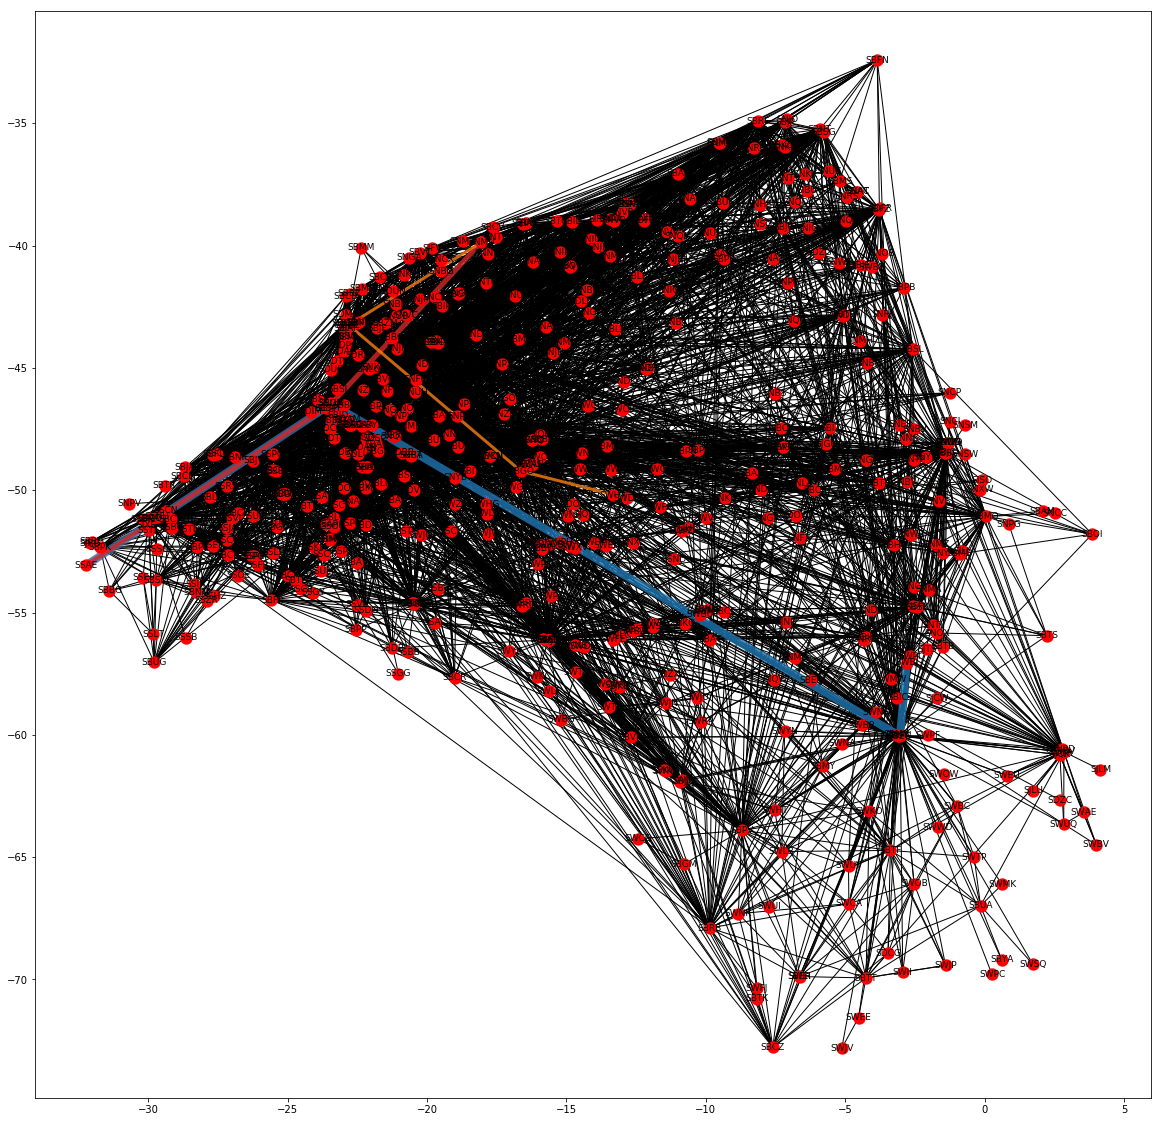

In [72]:
pos = pos_of_nodes(air_trafic)
plt.figure(figsize = (20,20))
nx.draw_networkx(air_trafic, pos =pos, linewidths = 0.1,font_size = 9 , node_size =150 )
nx.draw_networkx_edges(
    air_trafic,
    pos,
    edgelist=[('SWBI', 'SBEG'), ('SBEG', 'SBGR'), ('SBGR', 'SSAE')],
    width=8,
    alpha=0.8,
    edge_color="tab:blue",
)
nx.draw_networkx_edges(
    air_trafic,
    pos,
    edgelist=[('SSAE','SBGR'), ('SBGR', 'SNMU')],
    width=5,
    alpha=0.8,
    edge_color="tab:red",
)
nx.draw_networkx_edges(
    air_trafic,
    pos,
    edgelist=[('SNMU', 'SBGL'), ('SBGL', 'SBGO'),('SBGO', 'SWDE')],
    width=3,
    alpha=0.8,
    edge_color="tab:orange",
)


plt.show()

In [73]:
if nx.has_path(air_trafic,city4, city5 ):
  path = nx.shortest_path(air_trafic,city4,city5)
print(list(map(code_to_name, path)))
print(path)

['SÃO MIGUEL DO ARAGUAIA', 'GOIÂNIA', 'RIO DE JANEIRO', 'RIO DE JANEIRO']
['SWDE', 'SBGO', 'SBRJ', 'SDDM']


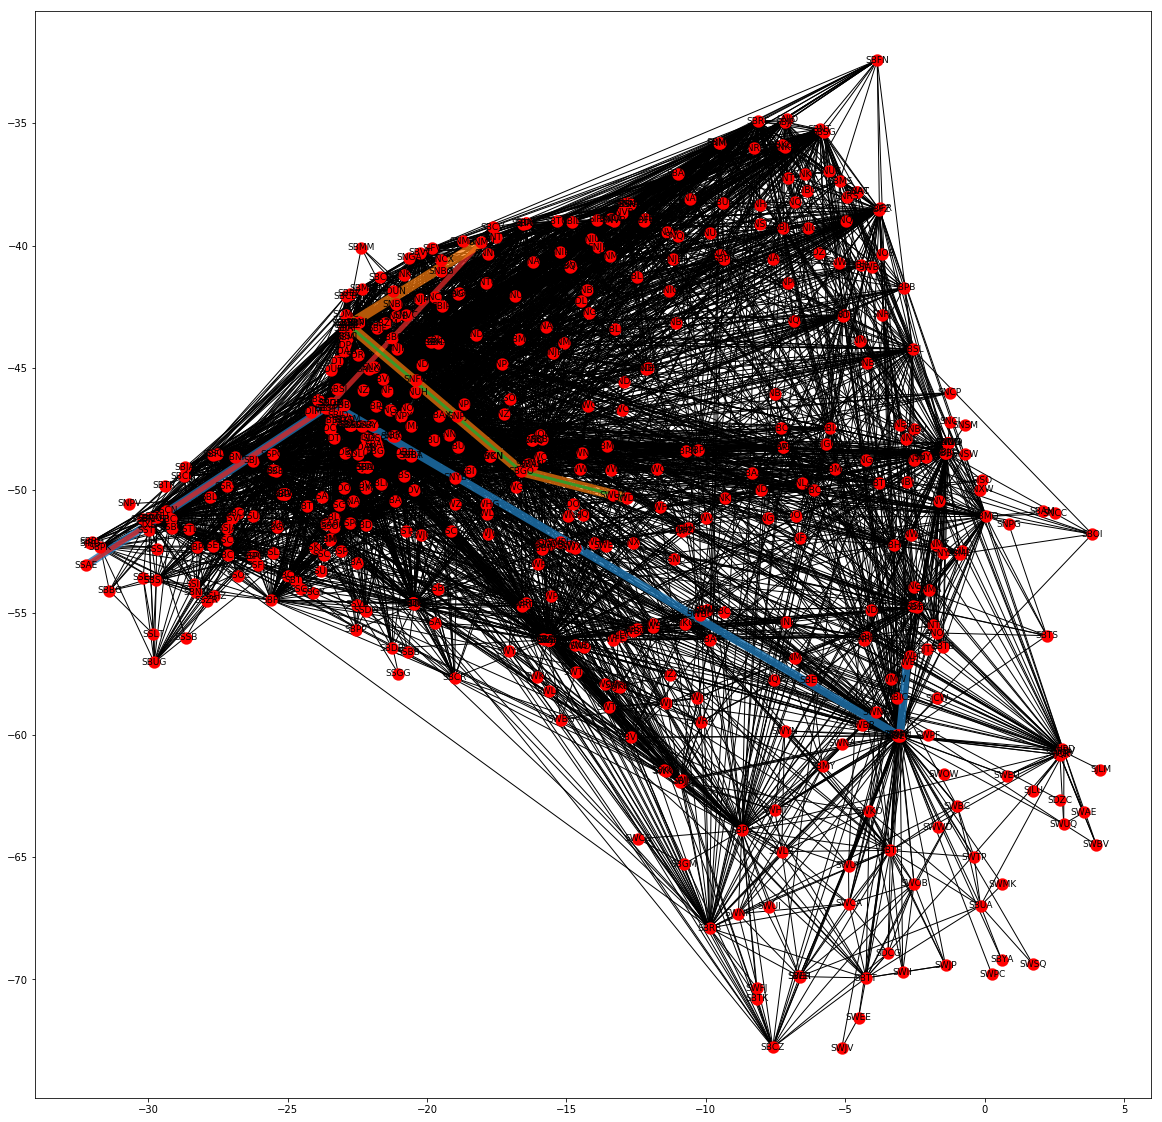

In [77]:
pos = pos_of_nodes(air_trafic)
plt.figure(figsize = (20,20))
nx.draw_networkx(air_trafic, pos =pos, linewidths = 0.1,font_size = 9 , node_size =150 )
nx.draw_networkx_edges(
    air_trafic,
    pos,
    edgelist=[('SWBI', 'SBEG'), ('SBEG', 'SBGR'), ('SBGR', 'SSAE')],
    width=8,
    alpha=0.8,
    edge_color="tab:blue",
)
nx.draw_networkx_edges(
    air_trafic,
    pos,
    edgelist=[('SSAE','SBGR'), ('SBGR', 'SNMU')],
    width=5,
    alpha=0.8,
    edge_color="tab:red",
)
nx.draw_networkx_edges(
    air_trafic,
    pos,
    edgelist=[('SNMU', 'SBGL'), ('SBGL', 'SBGO'),('SBGO', 'SWDE')],
    width=10,
    alpha=0.7,
    edge_color="tab:orange",
)
nx.draw_networkx_edges(
    air_trafic,
    pos,
    edgelist=[('SWDE', 'SBGO'), ('SBGO', 'SBRJ'),('SBRJ', 'SDDM')],
    width=3,
    alpha=0.9,
    edge_color="tab:green",
)

plt.show()

Clustering coefficient for all net

In [38]:
nx.average_clustering(air_trafic)

0.6310139004172535

In [39]:
nx.clustering(air_trafic)

{'SBPA': 0.28083989501312334,
 'SBGL': 0.2820957668285913,
 'SBGR': 0.20943826632449386,
 'SBBR': 0.2645985401459854,
 'SBSV': 0.2684674104521433,
 'SIRI': 1.0,
 'SNCL': 1.0,
 'SBBE': 0.2577433628318584,
 'SBBG': 0.6071428571428571,
 'SBBH': 0.2060345513892206,
 'SBBW': 0.6284584980237155,
 'SBCA': 0.6688815060908084,
 'SBCF': 0.3025344488188976,
 'SBCT': 0.28546267443435847,
 'SBCY': 0.24007155635062613,
 'SBEG': 0.22145669291338582,
 'SBIH': 0.2642706131078224,
 'SBIL': 0.6400580551523948,
 'SBJD': 0.47737556561085975,
 'SBKP': 0.233935998641881,
 'SBMD': 0.5324675324675324,
 'SBMG': 0.6561844863731656,
 'SBMQ': 0.45874125874125876,
 'SBNM': 0.6340579710144928,
 'SBPJ': 0.5054325955734407,
 'SBPS': 0.4800855386260358,
 'SBPV': 0.3868873742291464,
 'SBRF': 0.38168665524462214,
 'SBSN': 0.30644257703081235,
 'SBSR': 0.4368742368742369,
 'SBTB': 0.6526315789473685,
 'SBTU': 0.48185483870967744,
 'SBVH': 0.5548387096774193,
 'SBVT': 0.3902491408934708,
 'SISO': 0.6666666666666666,
 'SNEB

In [40]:
cc = nx.clustering(air_trafic)

In [41]:
list(cc.values())

[0.28083989501312334,
 0.2820957668285913,
 0.20943826632449386,
 0.2645985401459854,
 0.2684674104521433,
 1.0,
 1.0,
 0.2577433628318584,
 0.6071428571428571,
 0.2060345513892206,
 0.6284584980237155,
 0.6688815060908084,
 0.3025344488188976,
 0.28546267443435847,
 0.24007155635062613,
 0.22145669291338582,
 0.2642706131078224,
 0.6400580551523948,
 0.47737556561085975,
 0.233935998641881,
 0.5324675324675324,
 0.6561844863731656,
 0.45874125874125876,
 0.6340579710144928,
 0.5054325955734407,
 0.4800855386260358,
 0.3868873742291464,
 0.38168665524462214,
 0.30644257703081235,
 0.4368742368742369,
 0.6526315789473685,
 0.48185483870967744,
 0.5548387096774193,
 0.3902491408934708,
 0.6666666666666666,
 0.6666666666666666,
 1.0,
 1.0,
 0.7238095238095238,
 0.6274509803921569,
 1.0,
 1.0,
 0.6535947712418301,
 0.6666666666666666,
 0.7272727272727273,
 0.9333333333333333,
 0.8333333333333334,
 1.0,
 0.8333333333333334,
 0.6666666666666666,
 0.6405228758169934,
 0.6888888888888889,
 0,


(array([ 79.,   0.,  16.,  15.,  36.,  48.,  77.,  35.,  40., 159.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

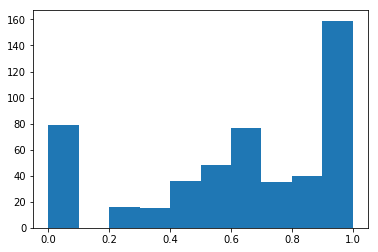

In [42]:
plt.hist(list(cc.values()))

In [43]:
nodes_of_sudeste = [i for i, data in air_trafic.nodes(data=True) if data['region'] == 'SUDESTE']
nodes_of_norte = [i for i, data in air_trafic.nodes(data=True) if data['region'] == 'NORTE']
nodes_of_nordeste =  [i for i, data in air_trafic.nodes(data=True) if data['region'] == 'NORDESTE']
nodes_of_sul =  [i for i, data in air_trafic.nodes(data=True) if data['region'] == 'SUL']
nodes_of_centro_oeste = [i for i, data in air_trafic.nodes(data=True) if data['region'] == 'CENTRO-OESTE']

In [44]:
#subgrafhs
grafh_of_nordeste = nx.subgraph(air_trafic,nodes_of_nordeste)
grafh_of_sudeste = nx.subgraph(air_trafic,nodes_of_sudeste)
grafh_of_norte = nx.subgraph(air_trafic,nodes_of_norte)
grafh_of_sul = nx.subgraph(air_trafic,nodes_of_sul)
grafh_of_centro_oeste = nx.subgraph(air_trafic,nodes_of_centro_oeste)

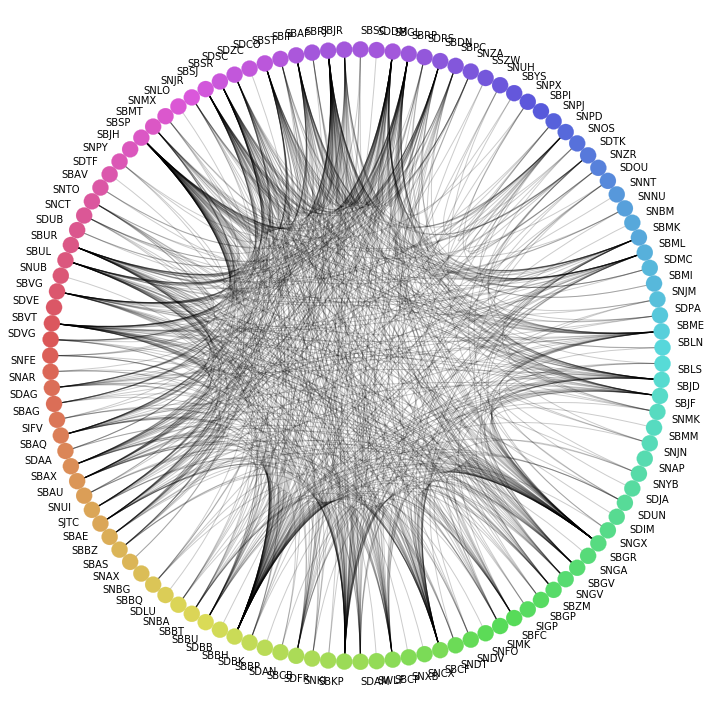

average_clustering :0.6175309816849804


In [45]:
grafh_of_sudeste.edges()

plot_of_sudeste = nv.CircosPlot(
              grafh_of_sudeste, 
              node_color='name', 
              node_grouping='name',
              node_order="name",
              node_labels=True,
              figsize = (10,10),
              nodeprops={"radius": 0.5},
               fontsize=12
               )


# Draw c to the screen
plot_of_sudeste.draw()
plot_of_sudeste.figure.tight_layout()

# Display the plot

plt.show()
print(f'average_clustering :{nx.average_clustering(grafh_of_sudeste)}')

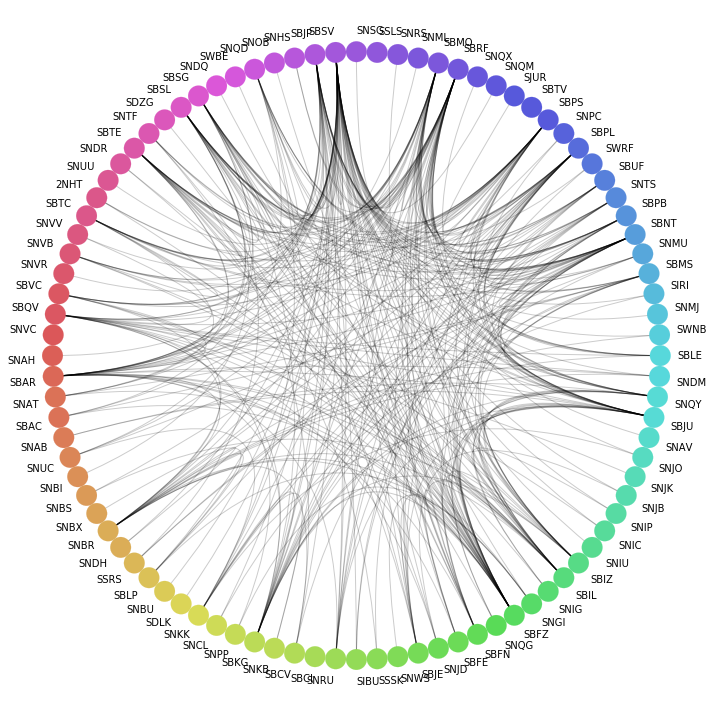

average_clustering :0.47198771887877156


In [46]:
plot_of_nordeste = nv.CircosPlot(
              grafh_of_nordeste, 
              node_color='name', 
              node_grouping='name',
              node_order="name",
              node_labels=True,
              figsize = (10,10),
              nodeprops={"radius": 0.5},
               fontsize=12
               )


# Draw c to the screen
plot_of_nordeste.draw()
plot_of_nordeste.figure.tight_layout()

# Display the plot

plt.show()
print(f'average_clustering :{nx.average_clustering(grafh_of_nordeste)}')

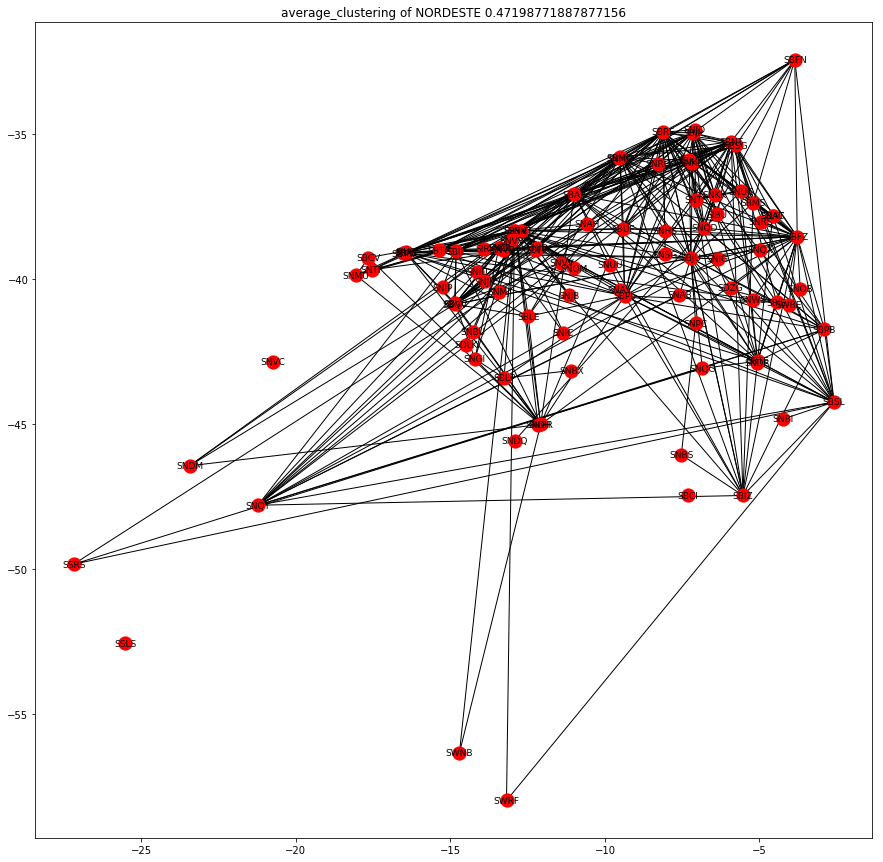

average_clustering :0.47198771887877156


In [78]:
pos = pos_of_nodes(grafh_of_nordeste)
plt.figure(figsize = (15,15))
plt.title(f'average_clustering of NORDESTE {nx.average_clustering(grafh_of_nordeste)}')
nx.draw_networkx(grafh_of_nordeste, pos =pos, linewidths = 0.1,font_size = 9 , node_size =200 )
plt.show()
print(f'average_clustering :{nx.average_clustering(grafh_of_nordeste)}')

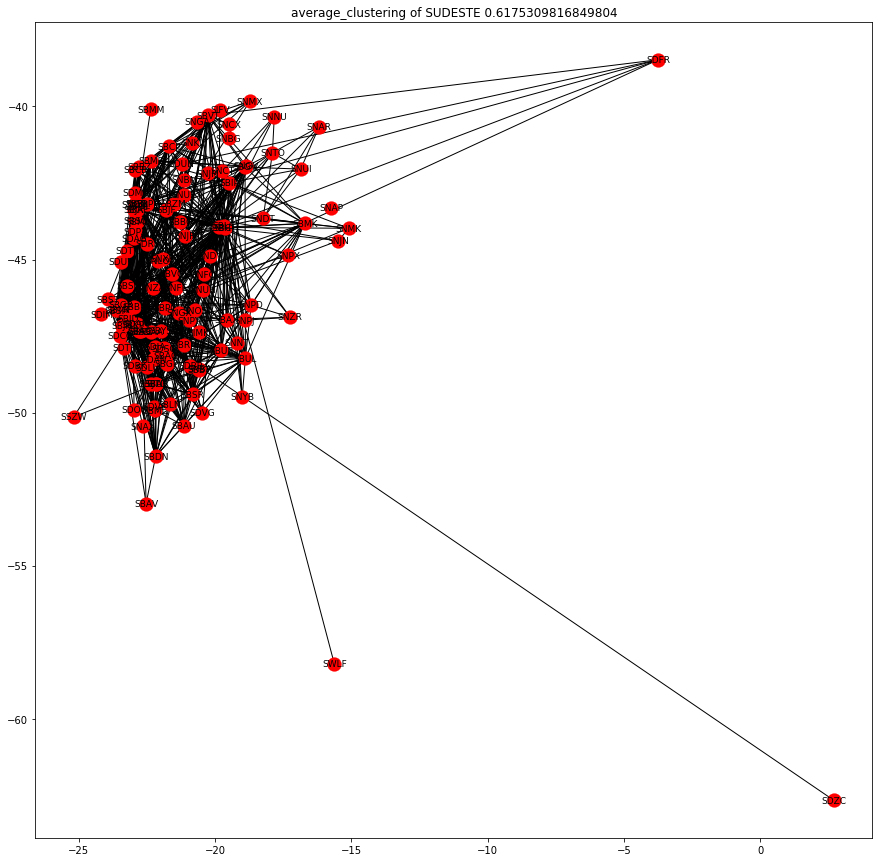

average_clustering :0.6175309816849804


In [79]:
pos = pos_of_nodes(grafh_of_sudeste)
plt.figure(figsize = (15,15))
plt.title(f'average_clustering of SUDESTE {nx.average_clustering(grafh_of_sudeste)}')
nx.draw_networkx(grafh_of_sudeste, pos =pos, linewidths = 0.1,font_size = 9, node_size =200 )

plt.show()
print(f'average_clustering :{nx.average_clustering(grafh_of_sudeste)}')

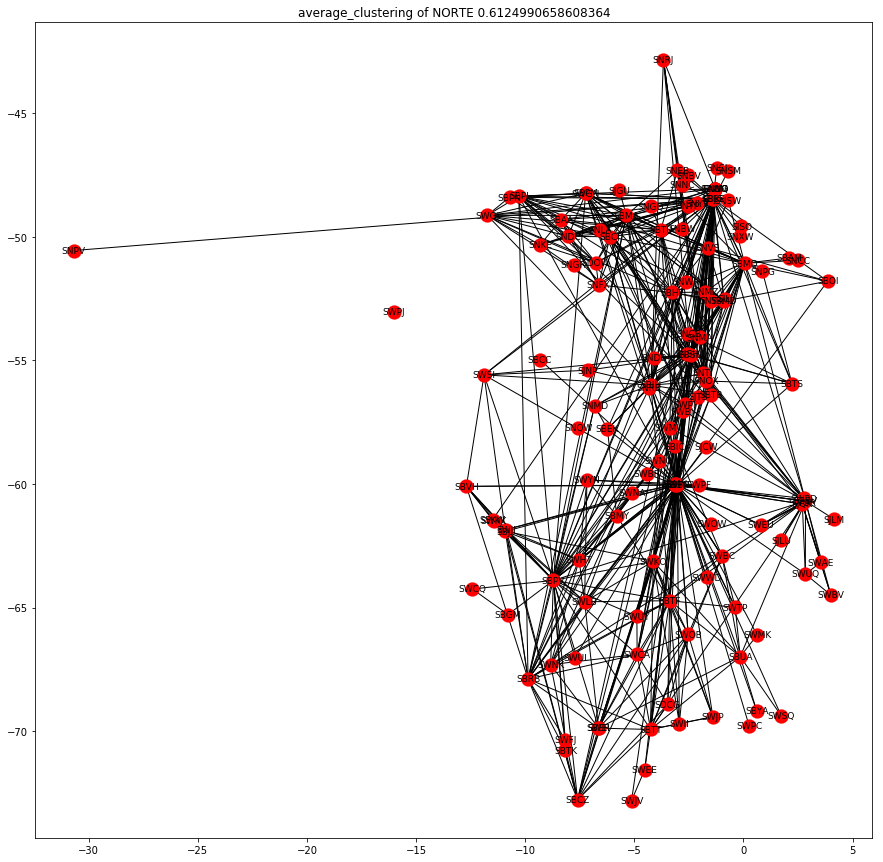

average_clustering :0.6124990658608364


In [80]:
pos = pos_of_nodes(grafh_of_norte)
plt.figure(figsize = (15,15))
plt.title(f'average_clustering of NORTE {nx.average_clustering(grafh_of_norte)}')
nx.draw_networkx(grafh_of_norte, pos =pos, linewidths = 0.1,font_size = 9, node_size =200  )
plt.show()
print(f'average_clustering :{nx.average_clustering(grafh_of_norte)}')

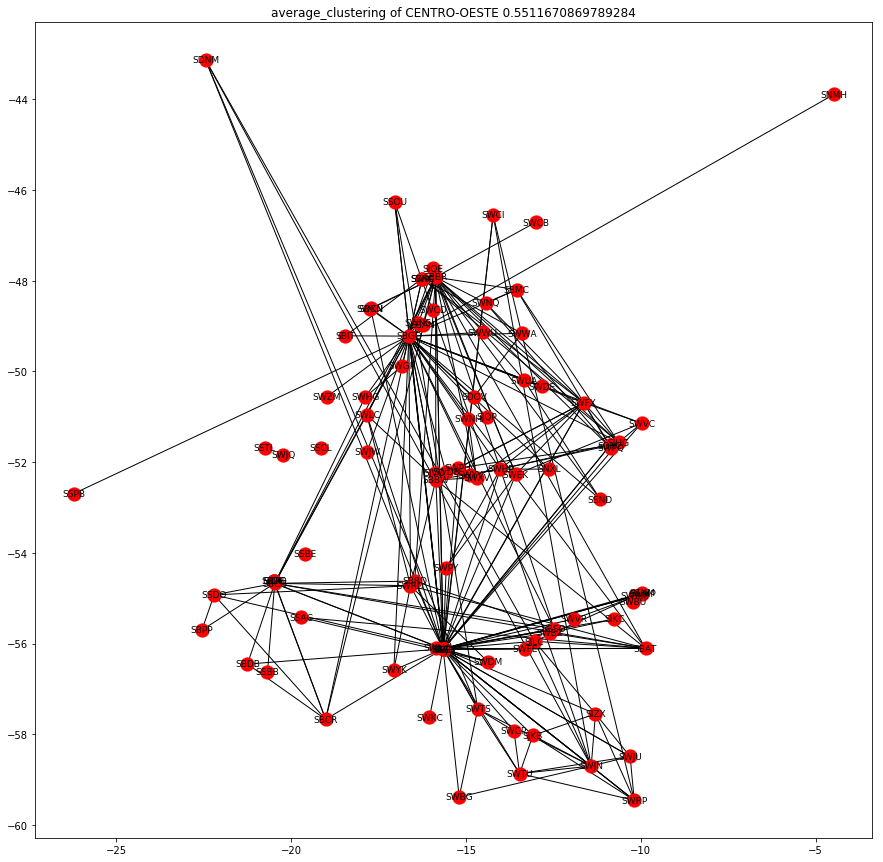

average_clustering :0.5511670869789284


In [81]:
pos = pos_of_nodes(grafh_of_centro_oeste)
plt.figure(figsize = (15,15))
plt.title(f'average_clustering of CENTRO-OESTE {nx.average_clustering(grafh_of_centro_oeste)}')
nx.draw_networkx(grafh_of_centro_oeste, pos =pos, linewidths = 0.1,font_size = 9 , node_size =200 )
plt.show()
print(f'average_clustering :{nx.average_clustering(grafh_of_centro_oeste)}')

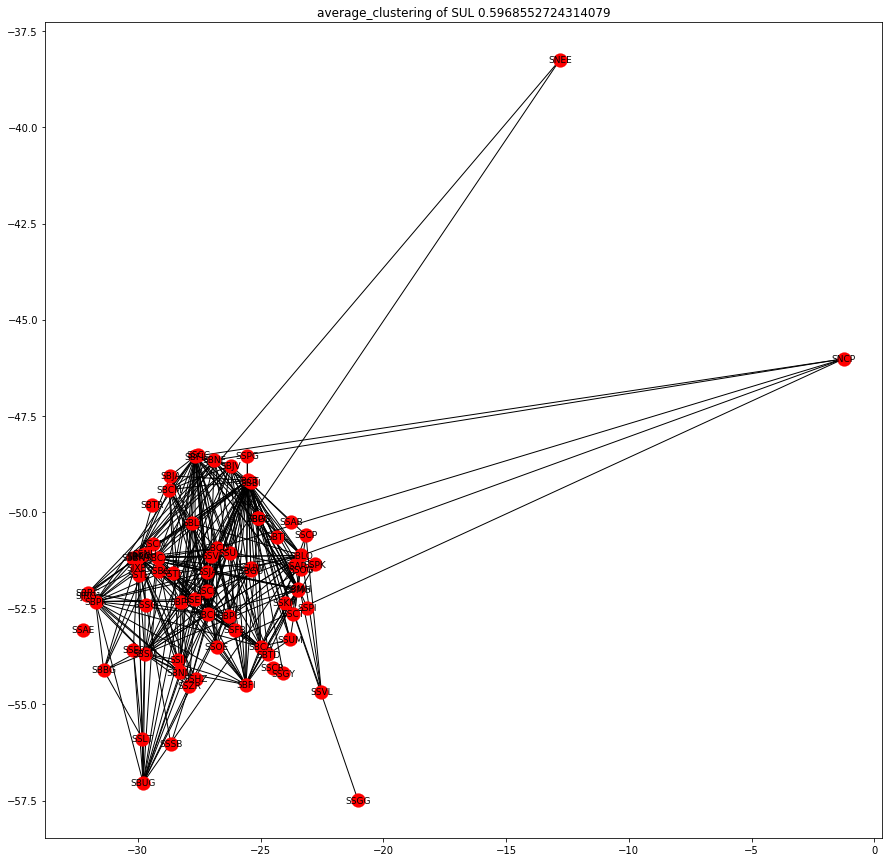

average_clustering :0.5968552724314079


In [83]:
pos = pos_of_nodes(grafh_of_sul)
plt.figure(figsize = (15,15))
plt.title(f'average_clustering of SUL {nx.average_clustering(grafh_of_sul)}')
nx.draw_networkx(grafh_of_sul, pos =pos, linewidths = 0.1,font_size = 9, node_size =200 )
plt.show()
print(f'average_clustering :{nx.average_clustering(grafh_of_sul)}')

In [53]:
nodes =nx.get_node_attributes(grafh_of_sul,'region')

lat = nx.get_node_attributes(grafh_of_sul,'latitude').values()
lon = nx.get_node_attributes(grafh_of_sul,'longitude').values()

nodes.keys()

dict_keys(['SNCP', 'SSSB', 'SBLJ', 'SBUG', 'SSLT', 'SBMH', 'SBTL', 'SBBG', 'SBNM', 'SSTE', 'SSVI', 'SSTD', 'SSFB', 'SBTR', 'SSEP', 'SSCR', 'SBCX', 'SBSM', 'SSCT', 'SIXE', 'SSAE', 'SSVL', 'SBCM', 'SSBN', 'SBCD', 'SBRG', 'SSCP', 'SNEE', 'SBFL', 'SBLO', 'SBBI', 'SBFI', 'SBTD', 'SSHZ', 'SSPI', 'SSSC', 'SBGS', 'SBCO', 'SBMG', 'SSZR', 'SBJA', 'SBPG', 'SSCK', 'SSCN', 'SSBG', 'SSCC', 'SSGY', 'SSPK', 'SSJA', 'SSPG', 'SSAP', 'SBGU', 'SBCT', 'SBNF', 'SBPA', 'SSUV', 'SJRG', 'SSIJ', 'SSER', 'SSOG', 'SSUM', 'SBCA', 'SSNH', 'SBCH', 'SSAB', 'SBJV', 'SBPF', 'SSUW', 'SSOE', 'SSKM', 'SSGG', 'SBPK', 'SBPO'])

In [54]:
pos = { node:(lati,long) for node , lati, long in zip(nodes.keys(),lat,lon)}
pos

{'SNCP': (-1.2502779960632324, -46.0172233581543),
 'SSSB': (-28.6549, -56.034599),
 'SBLJ': (-27.7821006775, -50.28150177),
 'SBUG': (-29.7821998596, -57.0382003784),
 'SSLT': (-29.8127002716, -55.8933982849),
 'SBMH': (-23.467089999999928, -51.99419999999998),
 'SBTL': (-24.317801, -50.6516),
 'SBBG': (-31.39049911499, -54.112201690674),
 'SBNM': (-28.2817, -54.169102),
 'SSTE': (-29.971359999999947, -51.62778999999995),
 'SSVI': (-26.99970054626465, -51.14189910888672),
 'SSTD': (-28.55083274841309, -51.59611129760742),
 'SSFB': (-26.059200286865234, -53.0634994506836),
 'SBTR': (-29.41489982605, -49.810001373291),
 'SSEP': (-30.18219947814941, -53.57939910888672),
 'SSCR': (-24.512699127197266, -54.0546989440918),
 'SBCX': (-29.1970996857, -51.1875),
 'SBSM': (-29.711399, -53.688202),
 'SSCT': (-23.691499710083008, -52.64189910888672),
 'SIXE': (-30.050277709960938, -51.44361114501953),
 'SSAE': (-32.22416687011719, -53.06722259521485),
 'SSVL': (-22.521667, -54.677776),
 'SBCM': (

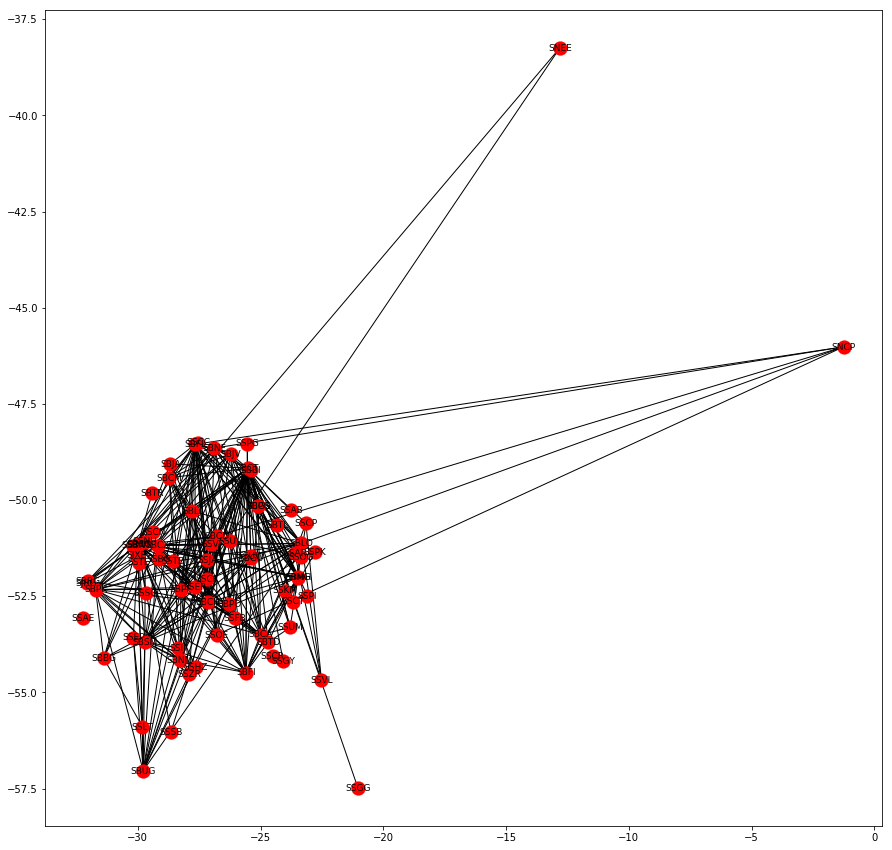

average_clustering :0.5968552724314079


In [55]:
pos = pos_of_nodes(grafh_of_sul)
plt.figure(figsize = (15,15))
nx.draw_networkx(grafh_of_sul, pos =pos, linewidths = 0.1,font_size = 9, node_size =200 )

plt.show()

print(f'average_clustering :{nx.average_clustering(grafh_of_sul)}')

## Mapa completo

In [58]:
if nx.has_path(air_trafic,"SWBI","SSAE"):
  path = nx.shortest_path(air_trafic,"SWBI","SSAE")
path

['SWBI', 'SBEG', 'SBGR', 'SSAE']